In [1]:

import os
print(os.listdir("../input"))


import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
Test = pd.read_csv("../input/test.csv")
Train = pd.read_csv("../input/train.csv")

In [3]:
Train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Total = Train.isnull().sum().sort_values(ascending=False)
PercentMV = Train.isnull().sum()/Train.isnull().count()*100
RoundP = (round(PercentMV, 1)).sort_values(ascending=False)
missing_data = pd.concat([Total, RoundP], axis=1, keys=['Total', 'Percentage'])
missing_data.head(4)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0


In [7]:
Train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survivors by Pclass')

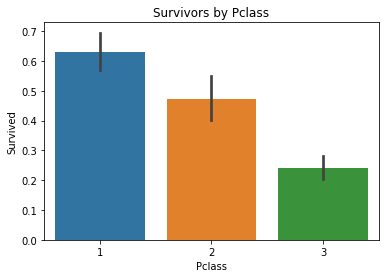

In [8]:
sns.barplot(x='Pclass', y='Survived', data=Train).set_title('Survivors by Pclass')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survivors by Sex')

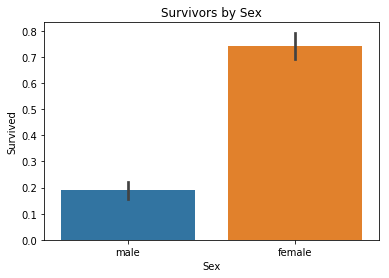

In [9]:
sns.barplot(x='Sex', y='Survived', data=Train).set_title('Survivors by Sex')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survivors by Port of Embarkation')

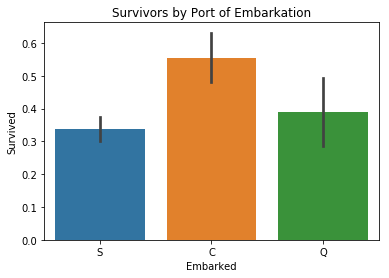

In [10]:
sns.barplot(x='Embarked', y='Survived', data=Train).set_title('Survivors by Port of Embarkation')


In [11]:
Train['Age'].min(), Train['Age'].max(), Train['Age'].mean(), Train['Age'].median()

(0.42, 80.0, 29.69911764705882, 28.0)

In [12]:
Train['Age'] = Train['Age'].fillna(Train['Age'].median())
Test['Age'] = Test['Age'].fillna(Train['Age'].median())

In [13]:
bins = [0,5,10,20,30,40,50,60,80]
labels=[1,2,3,4,5,6,7,8]
Train['Arange'] = pd.cut(Train['Age'], bins=bins, labels=labels, include_lowest=True)


Test['Arange'] = pd.cut(Test['Age'], bins=bins, labels=labels, include_lowest=True)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Survivors by Age Range')

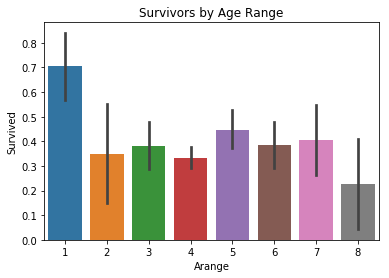

In [14]:
sns.barplot(x='Arange', y='Survived', data=Train).set_title('Survivors by Age Range')

In [15]:
Train.shape, Test.shape

((891, 13), (418, 12))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

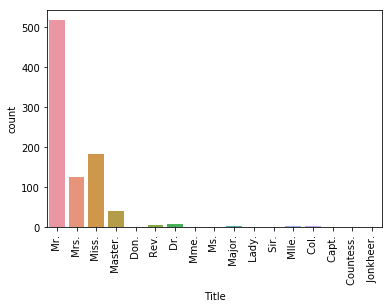

In [16]:
import re
Train['Title'] = Train['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group())
sns.countplot(x='Title', data=Train); 
plt.xticks(rotation=90)

In [17]:
Test['Title'] = Test['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group())

Train['Title'] = Train['Title'].astype('category').cat.codes
Test['Title'] = Test['Title'].astype('category').cat.codes

In [18]:
Train['HasCabin'] = ~Train['Cabin'].isnull()
Train['HasCabin'] = Train['HasCabin'].astype('category').cat.codes
Train = Train.drop(columns='Cabin')

Test['HasCabin'] = ~Test['Cabin'].isnull()
Test['HasCabin'] = Test['HasCabin'].astype('category').cat.codes
Test = Test.drop(columns='Cabin')

In [19]:
Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
Train['Sex'] = Train['Sex'].astype("category").cat.codes
Test['Sex'] = Test['Sex'].astype("category").cat.codes

Train['Embarked'] = Train['Embarked'].astype("category").cat.codes
Test['Embarked'] = Test['Embarked'].astype("category").cat.codes

In [21]:
Train['Fare'].min(), Train['Fare'].max(), Train['Fare'].mean(), Train['Fare'].median()

(0.0, 512.3292, 32.2042079685746, 14.4542)

In [22]:
Test['Fare'] = Test['Fare'].fillna(Train['Fare'].median())

bins = [0,4,8,12,16,32,65,130,260,520]

labels=[1,2,3,4,5,6,7,8,9]
Train['Fare'] = pd.cut(Train['Fare'], bins=bins, labels=labels, include_lowest=True)

Test['Fare'] = pd.cut(Test['Fare'], bins=bins, labels=labels, include_lowest=True)


In [23]:
Train.shape, Test.shape

((891, 14), (418, 13))

In [24]:
Train['FamNumber'] = Train['SibSp'] + Train['Parch']
Test['FamNumber'] = Test['SibSp'] + Test['Parch']

In [25]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Arange         0
Title          0
HasCabin       0
FamNumber      0
dtype: int64

In [26]:
Train.shape, Test.shape

((891, 15), (418, 14))

In [27]:
Train = Train.drop(columns=['SibSp', 'Parch', 'Name', 'Ticket'])
Test = Test.drop(columns=['SibSp', 'Parch', 'Name', 'Ticket'])

In [28]:
data = [Train, Test]
for ds in data:
    ds['AClass'] = ds['Age'] * ds['Pclass']

In [29]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Arange,Title,HasCabin,FamNumber,AClass
0,1,0,3,1,22.0,2,2,4,12,0,1,66.0
1,2,1,1,0,38.0,7,0,5,13,1,1,38.0
2,3,1,3,0,26.0,2,2,4,9,0,0,78.0
3,4,1,1,0,35.0,6,2,5,13,1,1,35.0
4,5,0,3,1,35.0,3,2,5,12,0,0,105.0


In [30]:
Test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Arange,Title,HasCabin,FamNumber,AClass
0,892,3,1,34.5,2,1,5,5,0,0,103.5
1,893,3,0,47.0,2,2,6,6,0,1,141.0
2,894,2,1,62.0,3,1,8,5,0,0,124.0
3,895,3,1,27.0,3,2,4,5,0,0,81.0
4,896,3,0,22.0,4,2,4,6,0,2,66.0


In [31]:
Train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare',
       'Embarked', 'Arange', 'Title', 'HasCabin', 'FamNumber', 'AClass'],
      dtype=object)

In [32]:
X_train = Train[[ 'Pclass', 'Sex', 'Age','Arange', 'Fare', 'Embarked',  'Title', 'HasCabin', 'FamNumber', 'AClass']]
Y_train = Train['Survived']
X_test = Test.drop("PassengerId", axis=1).copy()

In [33]:
X_train.head(0)

,Pclass,Sex,Age,Arange,Fare,Embarked,Title,HasCabin,FamNumber,AClass


In [34]:
X_test.head(0)

,Pclass,Sex,Age,Fare,Embarked,Arange,Title,HasCabin,FamNumber,AClass


In [35]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [39]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [40]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [42]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.18,Random Forest
96.18,Decision Tree
79.91,Logistic Regression
77.33,Naive Bayes
75.65,Support Vector Machines
69.70,Stochastic Gradient Decent
68.91,Perceptron


In [43]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.82222222 0.76404494 0.85393258 0.85393258 0.82022472
 0.85393258 0.76404494 0.8988764  0.81818182]
Mean: 0.820494836000454
Standard Deviation: 0.04482925047807654


In [44]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.203
AClass,0.175
Age,0.133
Title,0.121
Fare,0.100
FamNumber,0.088
Pclass,0.062
Arange,0.039
Embarked,0.039


In [45]:
random_forest = RandomForestClassifier(n_estimators=1000, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.18 %


In [46]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")


oob score: 82.6 %


param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

mCV=RandomForestClassifier()
mCV.fit(X_train, Y_train)

random_forest = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=10, n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

In [47]:
sub = pd.read_csv("../input/gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [48]:
submission = pd.DataFrame({'PassengerID':sub['PassengerId'], 'Survived':Y_prediction})

In [49]:
submission.to_csv("submission.csv", index=False)